In [1]:
import cv2
from matplotlib import pyplot as plt

In [2]:
def read_image(path):
    img = cv2.imread(path)
    return img

def show_image(img, mode=None):
    if mode == None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
    elif mode == "gray":
        plt.imshow(img, cmap="gray")
        plt.show()        

def to_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

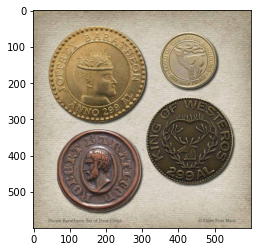

In [3]:
img = read_image("images/coin-train/coin1.jpg")
show_image(img)

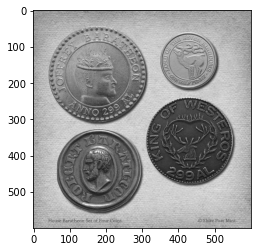

In [4]:
gray = to_gray(img)
show_image(gray)

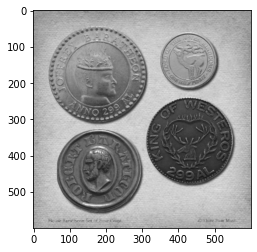

In [5]:
blur = cv2.medianBlur(gray,3)
show_image(blur)

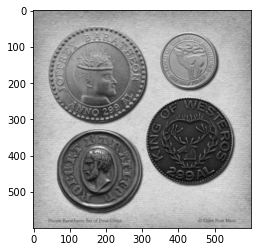

In [6]:
gblur = cv2.GaussianBlur(gray,(3,3),0)
show_image(gblur, "gray")

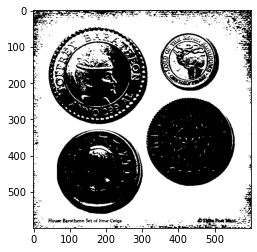

In [7]:
thresh = cv2.adaptiveThreshold(gblur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,601,2)
show_image(thresh, "gray")

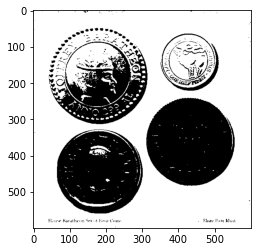

In [8]:
ret3,th3 = cv2.threshold(gblur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show_image(th3)

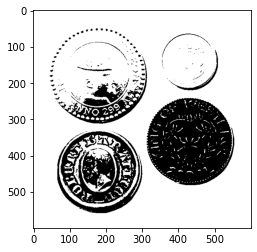

In [9]:
ret1,th1 = cv2.threshold(gblur,100,255,cv2.THRESH_BINARY)
show_image(th1)

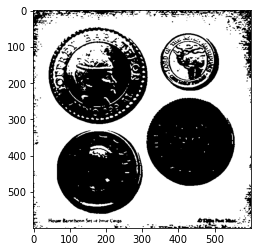

In [10]:
blur = cv2.medianBlur(thresh,3)
show_image(blur)

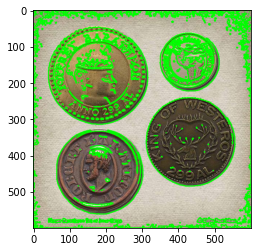

625


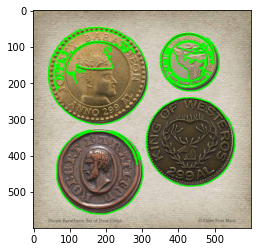

11


In [11]:
contours,_ = cv2.findContours(blur,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

img2 = img.copy()
cv2.drawContours(img2, contours, -1, (0, 255, 0), 2)
show_image(img2)
print(len(contours))
new_cnts = []
for cont in contours:
    area = cv2.contourArea(cont)
    if area < 100000 and area > 1000:
        new_cnts.append(cont)
img3 = img.copy()
cv2.drawContours(img3, new_cnts, -1, (0, 255, 0), 2)
show_image(img3)
print(len(new_cnts))

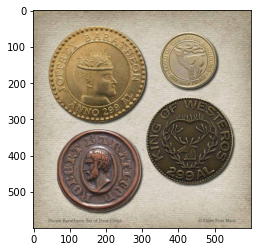

In [12]:
show_image(img)

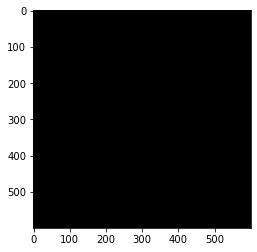